# Wprowadzenie do sieci neuronowych i uczenia maszynowego

## Lab: Wprowadzenie do biblioteki PyTorch

---

**Autorzy materiałów:** Marek Wydmuch, Jakub Bednarek<br>

---

## Uwaga

* **Aby wykonać polecenia należy najpierw przejść do trybu 'playground'. File -> Open in Playground Mode**
* Nowe funkcje Colab pozwalają na autouzupełnianie oraz czytanie dokumentacji.


## Dlaczego Colab

* Obliczenia wykonywane przez sieci są wymagające obliczeniowo, a ich specyfika sprawia, że można je dużo szybciej wykonywać na GPU.
* Nie każdy ma odpowiedni GPU w swoim komputerze (rekomendowane GPU to GPU firmy Nvidia, alternatywnie układy Apple Silicon).
* Dlatego sugerowany sposób pracy będzie przez Colab na którym jest skonfigurowane środowisko wraz ze skromnym GPU.

## Cel ćwiczeń

* wprowadzenie biblioteki PyTorch,
* ukazanie różnic i podobieństw pomiędzy NumPy a PyTorch,
* algorytm wstecznej propagacji błędu w PyTorch.

## PyTorch

PyTorch to potężna biblioteka do uczenia maszynowego i głębokiego uczenia, stworzona przez Meta (dawniej Facebook).
U podstaw jest to biblioteka implementująca operacje na tensorach (tablicach) na wzór NumPy, którego poszczególne elementy zostały zaprezentowane na poprzednich zajęciach.
PyTorch oferuje dynamiczne podejście do tworzenia sieci neuronowych, co sprawia, że jest szczególnie popularny w środowisku badawczym i akademickim.

Główne cechy PyTorch:
- Natywna integracja z Python i łatwa współpraca z bibliotekami jak NumPy
- Imperatywny styl programowania, który jest bardziej naturalny dla programistów Pythona
- Dynamiczne grafy obliczeniowe (define-by-run), które ułatwiają debugowanie
- Wsparcie dla CPU i GPU, z automatycznym przełączaniem między nimi
- Rozbudowany ekosystem narzędzi i bibliotek (torchvision, torchaudio, torchtext)

Aby rozpocząć pracę z PyTorch w Colab, wystarczy zaimportować bibliotekę:

In [1]:
import torch
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")

PyTorch version: 2.9.0+cu126
CUDA available: True


Jeśli nie korzystasz z Colab odwiedź https://pytorch.org/get-started/locally/ by dowiedzieć się jak zainstalować odpowiednią wersję dla swojego środowiska.

## Używanie biblioteki PyTorch

PyTorch domyślnie używa tensorów (tablic) z API bardzo podobnym do NumPy, poznanego na poprzednich zajęciach.

Poniżej przedstawione zostało porównanie wykonania tego samego zadania w NumPy oraz w PyTorch:

In [2]:
# Import biblioteki numpy
import numpy as np

# NumPy
print("NumPy:")
x_np = np.array([[1., 2.], [3., 4.]])
y_np = np.array([[5., 6.], [7., 8.]])
z_np = np.multiply(x_np, y_np)
print(f"x:\n{x_np}")
print(f"y:\n{y_np}")
print(f"x * y:\n{z_np}")

# PyTorch
print("\nPyTorch:")
x_torch = torch.tensor([[1., 2.], [3., 4.]])
y_torch = torch.tensor([[5., 6.], [7., 8.]])
z_torch = torch.mul(x_torch, y_torch)  # lub po prostu x_torch * y_torch
print(f"x:\n{x_torch}")
print(f"y:\n{y_torch}")
print(f"x * y:\n{z_torch}")

NumPy:
x:
[[1. 2.]
 [3. 4.]]
y:
[[5. 6.]
 [7. 8.]]
x * y:
[[ 5. 12.]
 [21. 32.]]

PyTorch:
x:
tensor([[1., 2.],
        [3., 4.]])
y:
tensor([[5., 6.],
        [7., 8.]])
x * y:
tensor([[ 5., 12.],
        [21., 32.]])


W obu przypadkach uzyskamy identyczny wynik, ale PyTorch oferuje dodatkowo:

- Automatyczne obliczanie gradientów (autograd)
- Łatwe przenoszenie obliczeń na GPU
- Zachowanie informacji o grafie obliczeniowym
- Pełną integrację z debuggerem Pythona

Inne przykłady składni bardzo podobnej do NumPy:

In [3]:
# Operacje są prawie identyczne jak w NumPy
print(x_np + y_np)
print(x_torch + y_torch)  # dodawanie

print(x_np * y_np)
print(x_torch * y_torch)  # mnożenie element-wise

print(x_np @ y_np)
print(x_torch @ y_torch)  # mnożenie macierzowe

print(np.mean(x_np))
print(torch.mean(x_torch))  # średnia

print(np.sum(x_np, axis=0))
print(torch.sum(x_torch, dim=0))  # suma wzdłuż wymiaru

[[ 6.  8.]
 [10. 12.]]
tensor([[ 6.,  8.],
        [10., 12.]])
[[ 5. 12.]
 [21. 32.]]
tensor([[ 5., 12.],
        [21., 32.]])
[[19. 22.]
 [43. 50.]]
tensor([[19., 22.],
        [43., 50.]])
2.5
tensor(2.5000)
[4. 6.]
tensor([4., 6.])


In [4]:
# Również w przypadku alokowania tablic/tensorów

# Tablice zer
arr_np = np.zeros([5, 5])
arr_torch = torch.zeros(5, 5)

# Tablice jedynek
arr_np = np.ones([5, 5])
arr_torch = torch.ones(5, 5)

# Tablice ze zdefiniowanymi wartościami
arr_np = np.array([1, 2, 3, 4, 5])
arr_torch = torch.tensor([1, 2, 3, 4, 5])

# Tablice z losowymi wartościami z rozkładu normalnego
arr_np = np.random.normal(0, 1, [5, 5])
arr_torch = torch.randn(5, 5)  # standardowy rozkład normalny (mean=0, std=1)
# Alternatywnie, z konkretną średnią i odchyleniem:
arr_torch = torch.normal(mean=0, std=1, size=(5, 5))

print('NumPy array:\n', arr_np, '\n')
print('PyTorch array:\n', arr_torch, '\n')

NumPy array:
 [[-0.64069685  0.56290288  1.07959671  1.46353629  0.5485723 ]
 [-0.63097981 -0.05725391  0.61254115  1.23389003  0.47516528]
 [-0.6494709   1.36283432 -0.3683534  -0.49957999  2.55744418]
 [ 0.47765266 -0.05407602 -0.0193659  -0.38021149  0.83466979]
 [ 0.1837246   1.03209086  0.43905697  2.20805503  0.3962404 ]] 

PyTorch array:
 tensor([[ 0.6215,  0.7222, -0.6500,  0.0541,  1.8846],
        [-0.3045, -0.4261,  0.0176,  0.6685, -0.1709],
        [-1.5036, -0.8756,  0.7268,  1.6607, -2.3792],
        [-0.2428, -1.9553,  0.1715, -0.2129,  2.1740],
        [ 1.4996, -0.0339, -0.4959, -0.0425, -2.3107]]) 



Warto zauważyć kilka różnic między NumPy a PyTorch:

- W PyTorch często pomijamy "nawiasy" przy definiowaniu wymiarów - używamy po prostu `torch.zeros(5, 5)` zamiast `torch.zeros([5, 5])` lub `torch.zeros((5, 5))`. Czyli kolejne wymiary są przekazywane jako kolejne argumenty a nie obiekt o typie sekwencji.
- Zamiast array używamy tensor do tworzenia tensorów ze zdefiniowanymi wartościami.
Dla rozkładu normalnego PyTorch oferuje zarówno `torch.randn()` (dla standardowego rozkładu normalnego) jak i bardziej ogólną funkcję `torch.normal()`.
- Operacje po konkretnych wymiarach używają argumentu `dim` zamiast `axis`.

Wszystkie te tensory mogą być łatwo przeniesione na GPU poprzez dodanie metody `.cuda()` lub `.to('cuda')`, na przykład:


In [ ]:
if torch.cuda.is_available():
    arr_torch = arr_torch.cuda()
arr_torch

Od teraz wszystkie operacje wykonywane na tym tensorze będą się automatycznie działy na GPU.

**Ważne:** Jeśli dwa obiekty wchodzą ze sobą w interakcję muszą znajdować się na tym samym urządzeniu (albo oba na GPU, albo oba na CPU).

### Zadanie 1

Zaalokuj tablicę samych zer o wymiarze 2 x 2. Następnie utwórz tablicę jedynek o tym samym wymiarze (wykorzystaj funkcję ones_like).

In [6]:
import torch

# alokacja zer
z = torch.zeros(2, 2)

# alokacja jedynek
o = torch.ones_like(z)

print(z)
print(o)

tensor([[0., 0.],
        [0., 0.]])
tensor([[1., 1.],
        [1., 1.]])


### Zmienne "uczone" i autograd w PyTorch

Drugim filarem biblioteki PyTorch, po operacjach na tensorach, jest autograd.
Autograd to kluczowa funkcjonalność, która umożliwia automatyczne obliczanie gradientów. Jest to fundamentalny mechanizm używany w uczeniu głębokich sieci neuronowych.

W PyTorch możemy oznaczać tensory, które mają brać udział w liczeniu gradientów poprzez `requires_grad=True`.

In [ ]:
x = torch.tensor(2.0, requires_grad=True)  # włączamy śledzenie gradientu
#x = torch.tensor(2.0)  # to spowoduje błąd poniższego kodu
print(f"x = {x}")
print(f"Czy x wymaga gradientu? {x.requires_grad}")

# Wykonujemy operacje matematyczne
y = x * 2  # y = 2x
z = y * y  # z = 4x²

print(f"\ny = {y}")
print(f"z = {z}")

# Obliczamy gradient dz/dx
z.backward()

# Sprawdzamy gradient (powinien być 16, bo dz/dx = 8x dla x=2)
print(f"\nGradient dz/dx = {x.grad}")

x = 2.0
Czy x wymaga gradientu? True

y = 4.0
z = 16.0

Gradient dz/dx = 16.0


In [8]:
# Alternatywną metodą zdefiniowana zmiennej wymagającej liczenia gradientu
# jest użycie klasy wrappującej parametr sieci neuronowej
import torch.nn as nn

x = nn.Parameter(torch.tensor(2.0))
print(f"x = {x}")
print(f"Czy x wymaga gradientu? {x.requires_grad}")

# Wykonujemy operacje matematyczne
y = x * 2  # y = 2x
z = y * y  # z = 4x²

print(f"\ny = {y}")
print(f"z = {z}")

# Obliczamy gradient dz/dx
z.backward()

# Sprawdzamy gradient (powinien być 16, bo dz/dx = 8x dla x=2)
print(f"\nGradient dz/dx = {x.grad}")

x = Parameter containing:
tensor(2., requires_grad=True)
Czy x wymaga gradientu? True

y = 4.0
z = 16.0

Gradient dz/dx = 16.0


Aby potem wyzerować gradient ale nie usuwać samej zmiennej możemy ustawić go na `None`.

In [9]:
x.grad = None

### Funkcje aktywacji i straty w PyTorch

PyTorch jest biblioteką przygotowaną do **Machine Learningu**. Wiele operacji bardzo często się powtarza w wielu zagadnieniach, np. funkcje aktywacji, funkcje straty, metryki, rodzaje warstw (operacji), itp. Stąd, w bilbiotece tej możemy znaleźć już gotowe komponenty, które można z łatwością wykorzystać (więcej o tym na kolejnych zajęciach).

Poniżej zaprezentowane zostały gotowe funkcje aktywacji oraz straty.

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F  # funkcje aktywacji i inne operacje

# 1. Funkcje aktywacji
# Możemy używać ich na dwa sposoby:
# a) Jako warstwy (zalecane w modelach, o warstwach więcej na kolejnych zajęciach):
activation_layers = {
    'ReLU': nn.ReLU(),
    'LeakyReLU': nn.LeakyReLU(negative_slope=0.1),
    'Sigmoid': nn.Sigmoid(),
    'Tanh': nn.Tanh(),
    'ELU': nn.ELU(alpha=1.0),
    'SELU': nn.SELU(),
    'Softmax': nn.Softmax(dim=1),
    'LogSoftmax': nn.LogSoftmax(dim=1)
}

# b) Jako funkcje (przydatne w obliczeniach doraźnych):
x = torch.randn(2, 3)
print("Dane wejściowe:")
print(x)

print("\nRóżne funkcje aktywacji:")
print("ReLU:", F.relu(x))
print("Sigmoid:", torch.sigmoid(x))
print("Tanh:", torch.tanh(x))
print("Softmax:", F.softmax(x, dim=1))

# 2. Funkcje straty (loss functions)
loss_functions = {
    'MSE': nn.MSELoss(),  # Mean Squared Error - regresja
    'BCE': nn.BCELoss(),  # Binary Cross Entropy - klasyfikacja binarna
    'CrossEntropy': nn.CrossEntropyLoss(),  # klasyfikacja wieloklasowa
    'L1': nn.L1Loss(),  # Mean Absolute Error
    'Huber': nn.HuberLoss(),  # połączenie MSE i L1
    'KLDiv': nn.KLDivLoss(),  # Kullback-Leibler Divergence
}

# Przykład użycia funkcji straty:
# Regresja
x = torch.randn(3, 1)  # predykcje
y = torch.randn(3, 1)  # wartości rzeczywiste
mse_loss = nn.MSELoss()(x, y)
print(f"\nMSE Loss: {mse_loss.item()}")

# Klasyfikacja
predictions = torch.randn(3, 5)  # logity dla 5 klas
targets = torch.tensor([1, 0, 4])  # prawidłowe klasy
ce_loss = nn.CrossEntropyLoss()(predictions, targets)
print(f"Cross Entropy Loss: {ce_loss.item()}")

Dane wejściowe:
tensor([[ 0.7131, -0.9472,  0.4600],
        [-0.3479,  1.3411, -0.5642]])

Różne funkcje aktywacji:
ReLU: tensor([[0.7131, 0.0000, 0.4600],
        [0.0000, 1.3411, 0.0000]])
Sigmoid: tensor([[0.6711, 0.2794, 0.6130],
        [0.4139, 0.7927, 0.3626]])
Tanh: tensor([[ 0.6126, -0.7385,  0.4301],
        [-0.3345,  0.8719, -0.5111]])
Softmax: tensor([[0.5085, 0.0967, 0.3948],
        [0.1385, 0.7499, 0.1116]])

MSE Loss: 3.425931930541992
Cross Entropy Loss: 1.6448410749435425


## Kompilacja grafów obliczeniowych

W PyTorch również istnieje możliwość optymalizacji kodu poprzez kompilację grafów obliczeniowych, używając torch.jit (znanego jako TorchScript) oraz torch.compile() (wprowadzonego w PyTorch 2.0). Zaletą ich używania jest to, że pozwalają one używać podzbioru normalnego Pythona.

In [ ]:
import torch
import time

# 1. Używając TorchScript (@torch.jit.script)
@torch.jit.script
def scripted_fn(x, y):
    for i in range(100):
        x = x + y
    return x

# 2. Używając torch.compile (PyTorch 2.0+)
@torch.compile
def compiled_fn(x, y):
    for i in range(100):
        x = x + y
    return x

# 3. Zwykła funkcja Pythona dla porównania
def regular_fn(x, y):
    for i in range(100):
        x = x + y
    return x

# Przygotowanie danych
x = torch.randn(1000, 1000)
y = torch.randn(1000, 1000)

# Porównanie wydajności
def benchmark(fn, name, x, y, warmup=1, runs=5):
    # Warmup
    for _ in range(warmup):
        _ = fn(x, y)

    # Pomiar czasu
    start = time.time()
    for _ in range(runs):
        _ = fn(x, y)
    end = time.time()

    print(f"{name}: {(end-start)/runs:.4f} sekund na iterację")

# Uruchamiamy benchmark
print("Porównanie wydajności:")
benchmark(regular_fn, "Zwykła funkcja", x, y)
benchmark(scripted_fn, "TorchScript", x, y)
benchmark(compiled_fn, "Torch Compile", x, y)

Porównanie wydajności:
Zwykła funkcja: 0.1193 sekund na iterację
TorchScript: 0.1151 sekund na iterację
Torch Compile: 0.0056 sekund na iterację


### Ważne uwagi:

TorchScript (`@torch.jit.script`):

- Kompiluje (szybko) kod Python do pośredniej reprezentacji
- Pozwala na eksport modelu do formatu niezależnego od Pythona
- Ma pewne ograniczenia składniowe i typowanie
- Dobry do produkcyjnego wdrażania modeli


Torch Compile (`@torch.compile`):

- Nowsza metoda wprowadzona w PyTorch 2.0
- Często daje lepszą optymalizację
- Łatwiejsza w użyciu niż TorchScript
- Zachowuje więcej funkcjonalności Pythona
- Wymaga dłuższej kompilacji przy pierwszym uruchomienu funkcji.

Generalnie od wersji 2.0 zaleca się używanie Torch Compile.
Zarówno TorchScript jak i Torch Compile utrudniają debugowanie.

## Algorytm wstecznej propagacji błędu

Do wyprowadzenia wzorów na aktualizację zmiennych w algorytmie niezbędna jest znajomość zagadnień **chain-rule** oraz **multivariable chain-rule**. Poza podstawową wiedzą z matematyki są to jedyne niezbędne zagadnienia.

### Chain-rule & Multivariable Chain-rule

Poniżej zostały zaprezentowane zagadnienia **chain-rule** oraz **multivariable chain-rule** w sposób intuicyjny (i graficzny). Poniższa notacja została zaczerpnięta z sieci neuronowych, aby skojarzyć związek z algorytmem **backpropagation**.

#### Chain-rule

Jest to reguła opierająca się na pochodnej funkcji złożonej. W graficzny sposób można to pokazać następująco:

![chain-rule](https://drive.google.com/uc?id=1S8pSUrrOzoisKr8d8YJaQHNLYgEq2dpk)

Gdzie $L$ to pewna funkcja dla której liczymy pochodną względem zmiennej $w$. Jak widać, $L$ zależy od $y$, który zależy od $z$ który dopiero zależy bezpośrednio od $w$. Zależności tworzą łańcuch, skąd pochodzi nazwa **chain-rule**.

#### Multivariable Chain-rule

W przypadku gdy "łańcuch" w pewnym momencie się rozgałęzia, dalej możemy korzystać z zasady **chain-rule**, jednak tym razem przybiera ona formę nieco inną (lecz dalej intuicyjną):

![multivariable-chain-rule](https://drive.google.com/uc?id=13WH6JXd_5rnTkyToKrBcCZDPdUXCqoT8)

W tym przypadku, pochodna funkcji $L$ po zmiennej $z$ wyrażona jest jako suma pochodnych funkcji złożonych odpowiednio $y_1$ oraz $y_2$. Nic nie stoi na przeszkodzie, żeby stosować tę regułę także w sytuacji większej liczby rozgałęzień niż dwa, po prostu zawsze się dodaje pochodne z osobnych "ścieżek".

<!-- \\ %ib: chyba nie jest to tak dobry przykład, jak myślałem...

##### **Przykład:**
Załóżmy, że mamy funkcję $f(x) = x\cdot ln(x)$. Możemy ją przedstawić jako $f(x) = g(x)\cdot h(x)$, gdzie $g(x)=x$ i $h(x)=ln(x)$. Korzystając z multivariable chain-rule możemy wyprowadzić:

$$\frac{\partial f(x)}{\partial x} = \frac{\partial g(x)h(x)}{\partial x} = \frac{\partial g(x)h(x)}{\partial g(x)} \frac{\partial g(x)}{\partial x} + \frac{\partial g(x)h(x)}{\partial h(x)} \frac{\partial h(x)}{\partial x} = h(x)\cdot 1 + g(x)\cdot \frac{1}{x} = ln(x) + 1$$

Zwróć uwagę, że wzór na pochodną iloczynu jest szczególnym przypadkiem multivariable chain-rule:
$$(g(x)h(x))' = g'(x)h(x) + g(x)h'(x) = 1\cdot ln(x) + x\cdot\frac{1}{x} = ln(x) + 1$$ -->

\\

### Backpropagation

Algorytm **wstecznej propagacji błędu** jest właściwie jedynie rozwinięciem **reguły delta/uczenia za pomocą metody spadku wzdłóż gradientu**, która została przedstawiona na pierwszych zajęciach. Podobnie jak poprzednio, uczenie neuronów opisane jest w następujący sposób:

$$w_i' = w_i - \mu \frac{\partial L}{\partial w_i} $$

Jedyną różnicą jest sposób w jaki się wylicza gradient. Nawiązując do powyższych, krótkich wyjaśnień **chain-rule**, w podobny sposób należy traktować sieci neuronowe.

**Dla warstwy wyjściowej** gradient można przedstawić następująco:

$$\frac{\partial L}{\partial w_{ij}} = \frac{\partial L}{\partial y_j} \frac{\partial y_j}{\partial w_{ji}} = \frac{\partial L}{\partial y_j} \frac{\partial y_j}{\partial z_j}\frac{\partial z_j}{\partial w_{ji}}$$

Albo inaczej:

$$\frac{\partial L}{\partial w_{ij}} = \delta_j o_i$$

gdzie $w_{ji}$ oznacza wagę połączenia pomiędzy neuronem $j$ a $i$, $\delta_j = \frac{\partial L}{\partial y_j} \frac{\partial y_j}{\partial z_j}$ oraz $o_i$ to wyjście z neuronu $i$ (dla neuronów w pierwszej warstwie będą to wejścia do sieci, natomiast w kolejnych warstwach będą to wyjścia z neuronów poprzednich).

**Dla warstwy ukrytej** sprawa nieco bardziej się komplikuje. Weźmy jako przykład następującą prostą sieć z 2 warstwami i łącznie 3 neuronami:

![simplenet](https://drive.google.com/uc?id=1NXHjEWUX3gAbn8NnHh9eGWdQaSNDavKW)

Dla warstwy wyjściowej możemy skorzystać jedynie z **chain-rule** uzyskując następujące równanie:

$$\frac{\partial L}{\partial w^{2}_{i}} = \frac{\partial L}{\partial y^{2}_i} \frac{\partial y^{2}_i}{\partial z^{2}_i}\frac{\partial z^{2}_i}{\partial w^{2}_{i}} = \delta^2_i y^1_1$$

Przy obliczaniu gradientu dla warstwy ukrytej najpierw stosujemy  proste **chain-rule**:

$$\frac{\partial L}{\partial w^{1}_{1}} = \frac{\partial L}{\partial y^{1}_1} \frac{\partial y^{1}_1}{\partial z^{1}_1}\frac{\partial z^{1}_1}{\partial w^{1}_{1}}$$

W tym momencie można zauważyć, że jest możliwe zastosowanie **multivariable chain-rule** do wyrażenia $\frac{\partial L}{\partial y^{1}_1}$ (ponieważ $L$ nie zależy bezpośrednio od $y^{1}_1$, oraz występuje "rozgałęzienie" od $y$):

$$\frac{\partial L}{\partial y^{1}_1} = \frac{\partial L}{\partial y^{2}_1} \frac{\partial y^{2}_1}{\partial y^{1}_1} + \frac{\partial L}{\partial y^{2}_2} \frac{\partial y^{2}_2}{\partial y^{1}_1} = \frac{\partial L}{\partial y^{2}_1} \frac{\partial y^{2}_1}{\partial z^{2}_1}\frac{\partial z^{2}_1}{\partial y^{1}_1} + \frac{\partial L}{\partial y^{2}_2} \frac{\partial y^{2}_2}{\partial z^{2}_2} \frac{\partial z^{2}_2}{\partial y^{1}_1}$$

Tu można zauważyć, że $\frac{\partial z^{2}_2}{\partial y^{1}_1} = w^2_2$ oraz $\frac{\partial L}{\partial y^{2}_2} \frac{\partial y^{2}_2}{\partial z^{2}_2} = \delta^2_2$ (przy założeniu liniowej funkcji aktywacji), co daje nam końcowo:

$$\frac{\partial L}{\partial y^{1}_1} = \sum_i^2 \delta^2_i w^2_i$$

Podstawiając do wcześniejszego wzoru otrzymujemy:

$$\frac{\partial L}{\partial w^{1}_{1}} = \sum_i^2 \delta^2_i w^2_i \frac{\partial y^{1}_1}{\partial z^{1}_1}\frac{\partial z^{1}_1}{\partial w^{1}_{1}}$$

Ostatecznie, za pomocą następujących podstawień możemy sprowadzić powyższe równanie do wersji spójnej z gradientem dla warstwy wyjściowej:

$$\sum_i^2 \delta^2_i w^2_i \frac{\partial y^{1}_1}{\partial z^{1}_1} = \delta^1_1$$
$$\frac{\partial z^{1}_1}{\partial w^{1}_{1}} = x$$
$$\frac{\partial L}{\partial w^{1}_{1}} = \delta^1_1 x$$



---

Podsumowując, zarówno dla warstwy wyjściowej jak i warstwy ukrytej gradienty możemy przedstawić w tej samej formie, składającej się z **błędu neuronu** ($\delta$), oraz wyjścia z poprzedniej warstwy ($y$ lub $x$).

$$\frac{\partial L}{\partial w^{i}_{j}} = \delta^i_j o^{(i-1)}$$

### Automatyczna wsteczna propagacja błędu

Można rozpatrywać różne algorytmy optymalizacji działające na bazie algorytmu wstecznej propagacji błędu, który sam w sobie jest po prostu pewną strategią przydziału informacji o błędzie do zmiennych, a to jak na tej podstawie będziemy je modyfikować pozostaje otwartą kwestią. Jednym z prostszych optymalizatorów jest **Stochastic Gradient Descent** (SGD). Różni się od klasycznego Gradient Descent tym, że w jego przypadku gradient liczony jest w każdej iteracji dla losowo wybranego podzbioru danych uczących zamiast dla wszystkich. Innym popularnym optymalizatorem jest **ADAM** (od "adaptive moment estimation"), który każdą zmienną modyfikuje na podstawie jej statystycznych momentów (rzędu 1 i 2) gradientu w pewnym oknie czasowym. Ogólnie konstruowanie optymalizatorów opartych na gradiencie to cała osobna obszerna dziedzina naukowa. Przykładowo, na niektórych problemach ADAM ma znacznie szybszą zbieżność niż SGD, ale na innych zauważalnie gorzej radzi sobie z uogólnieniem wiedzy i w efekcie błąd na zbiorze testowym jest większy.

Poniżej zaprezentowany został algorytm wstecznej propagacji błędu zaimplementowany w bibliotece PyTorch. Przykład składa się z definicji sieci neuronowej, funkcji straty oraz jednego kroku uczenia przy użyciu gotowego optymalizatora.

### Prosta sieć neuronowa

In [11]:
import torch

# zmienne uczone pojedynczego neuronu, który na wejście otrzymuje wektor 10 liczb
w = torch.nn.Parameter(torch.ones(10, 1))
b = torch.nn.Parameter(torch.ones(1))

# definicja 1-warstwowej sieci neuronowej z funkcją aktywacji relu
# (@ jest również aliasem do torch.matmul() w PyTorch)
def network(x):
    return torch.relu(x @ w + b)

### Funkcja straty

W poniższym kodzie torch.mean to odpowiednik np.mean i działa tak samo. Jako drugi argument można podać wymiar, po którym liczona będzie średnia (domyślnie liczona jest z wszystkich wymiarów). Jeżeli chodzi o *reduce* (nazywane również *fold*) w nazwie, to jest to schemat obliczeń często wykorzystywany w paradygmacie programowania funkcyjnego, i polega na rekurencyjnym przechodzeniu przez strukturę przy jednoczesnym konstruowaniu nowej, w pewnym sensie redukując tę strukturę (np. macierz liczb) do nowej struktury (np. liczby).

In [12]:
# mean squared error jako funkcja straty
def loss_fn(y_pred, y_true):
   return torch.mean((y_pred - y_true) ** 2)

### Obliczenie gradientu

In [13]:
# wsteczna propagacja błędu obsługiwana jest przez optymalizatory dostępne w PyTorch
optimizer = torch.optim.Adam([w, b], lr=0.001)
#optimizer = torch.optim.SGD([w, b], lr=0.001)  # a tutaj Stochastic Gradient Descent

# wejście oraz pożądane wyjście z sieci neuronowej
x = torch.rand(32, 10)
y_true = torch.ones(32, 1)

# W PyTorch nie potrzebujemy GradientTape, gradienty są obliczane automatycznie
# Najpierw zerujemy gradienty z poprzedniej iteracji
optimizer.zero_grad()

# Forward pass
y_pred = network(x)
l = loss_fn(y_pred, y_true)

# Backward pass - obliczenie gradientów
l.backward()

# Aktualizacja parametrów przez optymalizator
optimizer.step()

# Wyświetlenie gradientów
print([w.grad, b.grad])  # gradienty są przechowywane w .grad

[tensor([[4.6485],
        [3.6247],
        [5.2130],
        [5.4485],
        [5.3885],
        [5.3451],
        [4.1256],
        [5.4409],
        [3.4970],
        [4.8603]]), tensor([9.5716])]


#### Zadanie 2

Korzystając z wiedzy z tych i poprzednich zajęć stwórz sieć neuronową składającą się z 3 warstw o rozmiarach odpowiednio 1, 2, 1. Niech w pierwszej i drugiej warstwie funkcją aktywacji będzie sigmoid a wyjście z sieci funkcją liniową. Skorzystaj z funkcji straty MSE.

Naucz sieć neuronową, aby wykonywała funkcję **sinus** (wejściem sieci niech będzie kąt wyrażony w radianach). Trening sieci powinien polegać na wykonaniu algorytmu wstecznej propagacji błędu **ITERS** razy. Każda iteracja niech przetwarza **batch** danych o rozmiarze 16. Do nauki sieci wykorzystaj algorytm **Stochastic Gradient Descent** (`torch.optim.SGD`).

W celu optymalizacji szybkości działania, dodaj do definicji modelu adnotację @torch.compile.

Przy domyślnych parametrach wyjdzie zasadniczo linia prosta na zerze. Poeksperymentuj z prędkością uczenia i liczbą iteracji, by poprawić ten rezultat. Sprawdź, jak działa ReLU dla tego problemu. Dla sigmoidalnej funkcji aktywacji rezultat powinien przypominać następujący wykres:

![alt text](https://www.cs.put.poznan.pl/ibladek/students/eio/img/expected_sine.png)


Iteracja 0, Loss: 0.5458
Iteracja 100, Loss: 0.3096
Iteracja 200, Loss: 0.5450
Iteracja 300, Loss: 0.4529
Iteracja 400, Loss: 0.5523
Iteracja 500, Loss: 0.4969
Iteracja 600, Loss: 0.5347
Iteracja 700, Loss: 0.4405
Iteracja 800, Loss: 0.4119
Iteracja 900, Loss: 0.4728
Iteracja 1000, Loss: 0.5722
Iteracja 1100, Loss: 0.5011
Iteracja 1200, Loss: 0.4155
Iteracja 1300, Loss: 0.4769
Iteracja 1400, Loss: 0.5307
Iteracja 1500, Loss: 0.4472
Iteracja 1600, Loss: 0.5816
Iteracja 1700, Loss: 0.5867
Iteracja 1800, Loss: 0.5873
Iteracja 1900, Loss: 0.4100
Iteracja 2000, Loss: 0.5488
Iteracja 2100, Loss: 0.4004
Iteracja 2200, Loss: 0.4493
Iteracja 2300, Loss: 0.5505
Iteracja 2400, Loss: 0.5650
Iteracja 2500, Loss: 0.4797
Iteracja 2600, Loss: 0.4581
Iteracja 2700, Loss: 0.4915
Iteracja 2800, Loss: 0.4435
Iteracja 2900, Loss: 0.5917
Iteracja 3000, Loss: 0.4936
Iteracja 3100, Loss: 0.5945
Iteracja 3200, Loss: 0.5607
Iteracja 3300, Loss: 0.4630
Iteracja 3400, Loss: 0.5156
Iteracja 3500, Loss: 0.6823
Iter

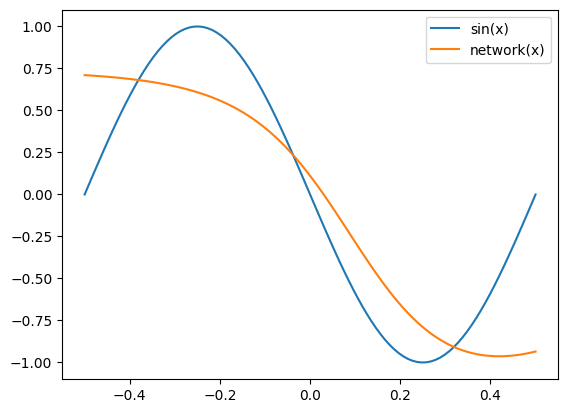

In [18]:
import math
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F

ITERS = 30000  # ilość iteracji
LR = 0.08      # prędkość uczenia

# pierwsza warstwa
w1 = torch.nn.Parameter(torch.rand(1, 2) * 0.1)
b1 = torch.nn.Parameter(torch.rand(2) * 0.1)

# druga warstwa
w2 = torch.nn.Parameter(torch.rand(2, 2) * 0.1)
b2 = torch.nn.Parameter(torch.rand(2) * 0.1)

# trzecia warstwa
w3 = torch.nn.Parameter(torch.rand(2, 1) * 0.1)
b3 = torch.nn.Parameter(torch.rand(1) * 0.1)

def layer_1(x):
    # Pierwsza warstwa: liniowa transformacja + sigmoid
    return F.sigmoid(x @ w1 + b1)

def layer_2(x):
    # Druga warstwa: liniowa transformacja + sigmoid
    return F.sigmoid(x @ w2 + b2)

def layer_3(x):
    # Trzecia warstwa: liniowa transformacja bez aktywacji
    return x @ w3 + b3

@torch.compile
def network(x):  # obliczanie wyjścia sieci
    x = layer_1(x)
    x = layer_2(x)
    x = layer_3(x)
    return x

# Definicja funkcji straty Mean Squared Error
criterion = nn.MSELoss()

all_parameters = [w1, b1, w2, b2, w3, b3]
optimizer = torch.optim.SGD(all_parameters, lr=LR)

for i in range(ITERS):
    # dane wejściowe
    x_input = torch.rand(16, 1) * (2 * math.pi)
    y_true = torch.sin(x_input)  # dane uczące (ground truth)
    x_scaled = (x_input - math.pi) / math.pi # przeskalowanie danych do [-1, 1]

    # zerowanie gradientów
    optimizer.zero_grad()

    # forward pass
    y_pred = network(x_scaled)

    # obliczanie błędu
    loss = criterion(y_pred, y_true)

    # backward pass
    loss.backward()

    # aktualizacja wag
    optimizer.step()

    if i % 100 == 0:
        print(f'Iteracja {i}, Loss: {loss.item():.4f}')

# testowanie sieci na zbiorze testowym
x = torch.linspace(0, 2 * math.pi, 100).reshape(-1, 1)
y_test = torch.sin(x)
x = (x - math.pi) / (2 * math.pi)
with torch.no_grad():  # wyłączamy obliczanie gradientów podczas testowania
    y_pred = network(x)

# konwersja do numpy dla matplotlib
x = x.numpy()
y_test = y_test.numpy()
y_pred = y_pred.numpy()

plt.plot(x, y_test, label='sin(x)')
plt.plot(x, y_pred, label='network(x)')
plt.legend()
plt.show()

#### Zadanie 3

Wykonaj ponownie zadanie 2, tym razem samodzielnie implementując algorytm backpropagation.

Iteracja 0, Loss: 0.4895
Iteracja 100, Loss: 0.2665
Iteracja 200, Loss: 0.6119
Iteracja 300, Loss: 0.6410
Iteracja 400, Loss: 0.5683
Iteracja 500, Loss: 0.4756
Iteracja 600, Loss: 0.5246
Iteracja 700, Loss: 0.4926
Iteracja 800, Loss: 0.4904
Iteracja 900, Loss: 0.4805
Iteracja 1000, Loss: 0.4642
Iteracja 1100, Loss: 0.5560
Iteracja 1200, Loss: 0.6384
Iteracja 1300, Loss: 0.4299
Iteracja 1400, Loss: 0.7204
Iteracja 1500, Loss: 0.4988
Iteracja 1600, Loss: 0.4008
Iteracja 1700, Loss: 0.4803
Iteracja 1800, Loss: 0.4656
Iteracja 1900, Loss: 0.4518
Iteracja 2000, Loss: 0.4691
Iteracja 2100, Loss: 0.4987
Iteracja 2200, Loss: 0.5748
Iteracja 2300, Loss: 0.4811
Iteracja 2400, Loss: 0.5239
Iteracja 2500, Loss: 0.4549
Iteracja 2600, Loss: 0.6372
Iteracja 2700, Loss: 0.5651
Iteracja 2800, Loss: 0.3611
Iteracja 2900, Loss: 0.5881
Iteracja 3000, Loss: 0.4026
Iteracja 3100, Loss: 0.4088
Iteracja 3200, Loss: 0.3807
Iteracja 3300, Loss: 0.5737
Iteracja 3400, Loss: 0.3215
Iteracja 3500, Loss: 0.3073
Iter

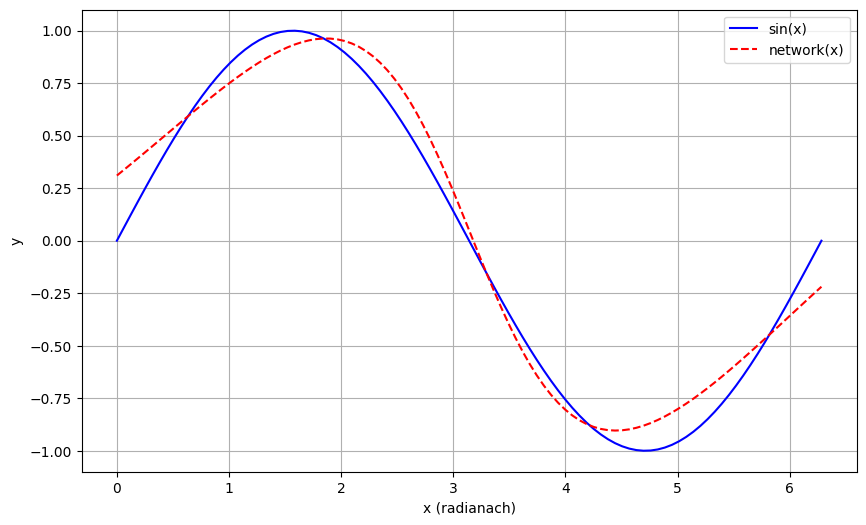

In [7]:
import math
import numpy as np
import matplotlib.pyplot as plt
import torch

ITERS = 20000  # ilość iteracji
LR = 0.11      # prędkość uczenia


def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

def sigmoid_derivative(output): # pochodna sigmoid
    return output * (1 - output)

def mse_loss(y_pred, y_true):
    return torch.mean((y_pred - y_true)**2)

def mse_loss_derivative(y_pred, y_true): # pochodna MSE względem y_pred
    return 2 * (y_pred - y_true) / y_pred.shape[0] # dzielimy przez batch_size

w1 = torch.nn.Parameter(torch.rand(1, 2) * 0.1)
b1 = torch.nn.Parameter(torch.rand(2) * 0.1)

w2 = torch.nn.Parameter(torch.rand(2, 2) * 0.1)
b2 = torch.nn.Parameter(torch.rand(2) * 0.1)

w3 = torch.nn.Parameter(torch.rand(2, 1) * 0.1)
b3 = torch.nn.Parameter(torch.rand(1) * 0.1)

# Forward Pass
def forward_layer_1(x_input, w, b):
    z = x_input @ w + b # liniowa transformacja
    a = sigmoid(z)      # aktywacja sigmoid
    return a, z, x_input # zwracamy aktywację, pre-aktywację i wejście do warstwy

def forward_layer_2(a_prev, w, b):
    z = a_prev @ w + b  # liniowa transformacja
    a = sigmoid(z)      # aktywacja sigmoid
    return a, z, a_prev # zwracamy aktywację, pre-aktywację i wejście do warstwy

def forward_layer_3(a_prev, w, b):
    z = a_prev @ w + b # liniowa transformacja
    y_pred = z         # predykcja jest równa pre-aktywacji dla warstwy liniowej
    return y_pred, z, a_prev # zwracamy predykcję, pre-aktywację i wejście do warstwy

def network_forward(x_scaled):
    a1, z1, x_for_l1_grad = forward_layer_1(x_scaled, w1, b1)
    a2, z2, a1_for_l2_grad = forward_layer_2(a1, w2, b2)
    y_pred, z3, a2_for_l3_grad = forward_layer_3(a2, w3, b3)
    # zwracamy predykcję oraz krotkę ze wszystkimi wartościami potrzebnymi do backpropagation
    return y_pred, (a1, z1, x_for_l1_grad, a2, z2, a1_for_l2_grad, z3, a2_for_l3_grad)


for i in range(ITERS):
    # dane wejściowe
    x_input = torch.rand(16, 1) * (2 * math.pi)
    y_true = torch.sin(x_input)  # dane uczące (ground truth)
    x_scaled = (x_input - math.pi) / math.pi

    # manualne zerowanie gradientów dla wszystkich parametrów
    for p in [w1, b1, w2, b2, w3, b3]:
        if p.grad is not None:
            p.grad.zero_()

    # Forward pass
    y_pred, (a1, z1, x_for_l1_grad, a2, z2, a1_for_l2_grad, z3, a2_for_l3_grad) = network_forward(x_scaled)

    # Obliczanie błędu
    loss = mse_loss(y_pred, y_true)


    # Backward Pass

    # 1. Gradient funkcji straty względem wyjścia sieci (y_pred)
    dL_dy_pred = mse_loss_derivative(y_pred, y_true)

    # 2. Propagacja wsteczna przez Warstwę 3 (Liniowa)
    # y_pred = z3 = a2_for_l3_grad @ w3 + b3
    dL_dz3 = dL_dy_pred # Dla warstwy liniowej, dL/dz = dL/dy_pred

    # dL/dw3 = (dL/dz3) * (dz3/dw3) = dL_dz3.T @ a2_for_l3_grad (ze względu na wymiary macierzowe)
    w3.grad = (a2_for_l3_grad.T @ dL_dz3)

    # dL/db3 = sum(dL/dz3)
    b3.grad = dL_dz3.sum(dim=0)

    # dL/da2 (gradient przekazywany do poprzedniej warstwy) = (dL/dz3) * (dz3/da2) = dL_dz3 @ w3.T
    dL_da2 = dL_dz3 @ w3.T

    # 3. Propagacja wsteczna przez Warstwę 2
    # a2 = sigmoid(z2), z2 = a1_for_l2_grad @ w2 + b2
    # dL/dz2 = (dL/da2) * (da2/dz2) = dL_da2 * sigmoid_derivative(a2)
    dL_dz2 = dL_da2 * sigmoid_derivative(a2)

    # dL/dw2 = (dL/dz2).T @ a1_for_l2_grad
    w2.grad = (a1_for_l2_grad.T @ dL_dz2)

    # dL/db2 = sum(dL/dz2)
    b2.grad = dL_dz2.sum(dim=0)

    # dL/da1 (gradient przekazywany do poprzedniej warstwy) = (dL/dz2) @ w2.T
    dL_da1 = dL_dz2 @ w2.T

    # 4. Propagacja wsteczna przez Warstwę 1
    # a1 = sigmoid(z1), z1 = x_for_l1_grad @ w1 + b1
    # dL/dz1 = (dL/da1) * (da1/dz1) = dL_da1 * sigmoid_derivative(a1)
    dL_dz1 = dL_da1 * sigmoid_derivative(a1)

    # dL/dw1 = (dL/dz1).T @ x_for_l1_grad
    w1.grad = (x_for_l1_grad.T @ dL_dz1)

    # dL/db1 = sum(dL/dz1)
    b1.grad = dL_dz1.sum(dim=0)


    with torch.no_grad():
        for p in [w1, b1, w2, b2, w3, b3]:
            if p.grad is not None:
                p.data -= LR * p.grad

    if i % 100 == 0:
        print(f'Iteracja {i}, Loss: {loss.item():.4f}')

# testowanie sieci na zbiorze testowym
x_test_raw = torch.linspace(0, 2 * math.pi, 100).reshape(-1, 1)
y_test = torch.sin(x_test_raw)
x_test_scaled = (x_test_raw - math.pi) / math.pi

with torch.no_grad():
    y_pred_test, _ = network_forward(x_test_scaled)

# Konwersja do numpy dla matplotlib
x_plot = x_test_raw.numpy()
y_test_plot = y_test.numpy()
y_pred_plot = y_pred_test.numpy()

plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_test_plot, label='sin(x)', color='blue')
plt.plot(x_plot, y_pred_plot, label='network(x)', color='red', linestyle='--')
plt.xlabel('x (radianach)')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()